# 2013-11086 김찬규 과제 4

In [28]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
df = pd.read_csv("data/titanic.csv")
df.head()

,Passenger Class,Name,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Ticket Number,Passenger Fare,Cabin,Port of Embarkation,Life Boat,Survived
0,First,"Allen, Miss. Elisabeth Walton",Female,29.0,0.0,0.0,24160,211.3,B5,Southampton,2,Yes
1,First,"Allison, Master. Hudson Trevor",Male,0.9,1.0,2.0,113781,151.6,C22 C26,Southampton,11,Yes
2,First,"Allison, Miss. Helen Loraine",Female,2.0,1.0,2.0,113781,151.6,C22 C26,Southampton,NaN,No
3,First,"Allison, Mr. Hudson Joshua Creighton",Male,30.0,1.0,2.0,113781,151.6,C22 C26,Southampton,NaN,No
4,First,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",Female,25.0,1.0,2.0,113781,151.6,C22 C26,Southampton,NaN,No


In [4]:
model = DecisionTreeClassifier(max_depth=3)

In [6]:
col_names = ["Passenger Class", "Sex", "Age",
             "No of Siblings or Spouses on Board",
             "No of Parents or Children on Board",
             "Passenger Fare", "Survived"]
df = df[col_names]

,Passenger Class,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Passenger Fare,Survived
0,First,Female,29.0,0.0,0.0,211.3,Yes
1,First,Male,0.9,1.0,2.0,151.6,Yes
2,First,Female,2.0,1.0,2.0,151.6,No
3,First,Male,30.0,1.0,2.0,151.6,No
4,First,Female,25.0,1.0,2.0,151.6,No


In [8]:
df.loc[df["Sex"] == "Male", "Sex"] = 0
df.loc[df["Sex"] == "Female", "Sex"] = 1

,Passenger Class,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Passenger Fare,Survived
0,First,1,29.0,0.0,0.0,211.3,Yes
1,First,0,0.9,1.0,2.0,151.6,Yes
2,First,1,2.0,1.0,2.0,151.6,No
3,First,0,30.0,1.0,2.0,151.6,No
4,First,1,25.0,1.0,2.0,151.6,No


In [9]:
df.loc[df["Passenger Class"] == "First", "Passenger Class"] = 1
df.loc[df["Passenger Class"] == "Second", "Passenger Class"] = 2
df.loc[df["Passenger Class"] == "Third", "Passenger Class"] = 3

,Passenger Class,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Passenger Fare,Survived
0,1,1,29.0,0.0,0.0,211.3,Yes
1,1,0,0.9,1.0,2.0,151.6,Yes
2,1,1,2.0,1.0,2.0,151.6,No
3,1,0,30.0,1.0,2.0,151.6,No
4,1,1,25.0,1.0,2.0,151.6,No


In [11]:
df.loc[df['Passenger Fare'].isnull(), 'Passenger Fare'] = 0

Passenger Class                         0
Sex                                     0
Age                                   263
No of Siblings or Spouses on Board      0
No of Parents or Children on Board      0
Passenger Fare                          0
Survived                                0
dtype: int64

In [12]:
mean_age_by_class = df.groupby('Passenger Class')['Age'].mean()

Passenger Class
1    39.159859
2    29.506513
3    24.816567
Name: Age, dtype: float64

In [13]:
df.loc[(df['Passenger Class'] == 1) & (df['Age'].isnull()), 'Age'] = mean_age_by_class.loc[1]
df.loc[(df['Passenger Class'] == 2) & (df['Age'].isnull()), 'Age'] = mean_age_by_class.loc[2]
df.loc[(df['Passenger Class'] == 3) & (df['Age'].isnull()), 'Age'] = mean_age_by_class.loc[3]

,Passenger Class,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Passenger Fare,Survived
0,1,1,29.0,0.0,0.0,211.3,Yes
1,1,0,0.9,1.0,2.0,151.6,Yes
2,1,1,2.0,1.0,2.0,151.6,No
3,1,0,30.0,1.0,2.0,151.6,No
4,1,1,25.0,1.0,2.0,151.6,No


In [15]:
df.isnull().sum()

Passenger Class                       0
Sex                                   0
Age                                   0
No of Siblings or Spouses on Board    0
No of Parents or Children on Board    0
Passenger Fare                        0
Survived                              0
dtype: int64

In [16]:
df['Survived'] = pd.Categorical(df['Survived'], categories=['No', 'Yes'])
df['Survived']  = df['Survived'].cat.codes

,Passenger Class,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Passenger Fare,Survived
0,1,1,29.0,0.0,0.0,211.3,1
1,1,0,0.9,1.0,2.0,151.6,1
2,1,1,2.0,1.0,2.0,151.6,0
3,1,0,30.0,1.0,2.0,151.6,0
4,1,1,25.0,1.0,2.0,151.6,0


In [18]:
df.head()

,Passenger Class,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Passenger Fare,Survived
0,1,1,29.0,0.0,0.0,211.3,1
1,1,0,0.9,1.0,2.0,151.6,1
2,1,1,2.0,1.0,2.0,151.6,0
3,1,0,30.0,1.0,2.0,151.6,0
4,1,1,25.0,1.0,2.0,151.6,0


In [21]:
col_x = col_names[:-1]
col_y = col_names[-1]
X = df[col_x]
Y = df[col_y]

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify=Y)

In [23]:
print(X_train.shape, Y_train.shape)

(916, 6) (916,)


In [24]:
model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [26]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

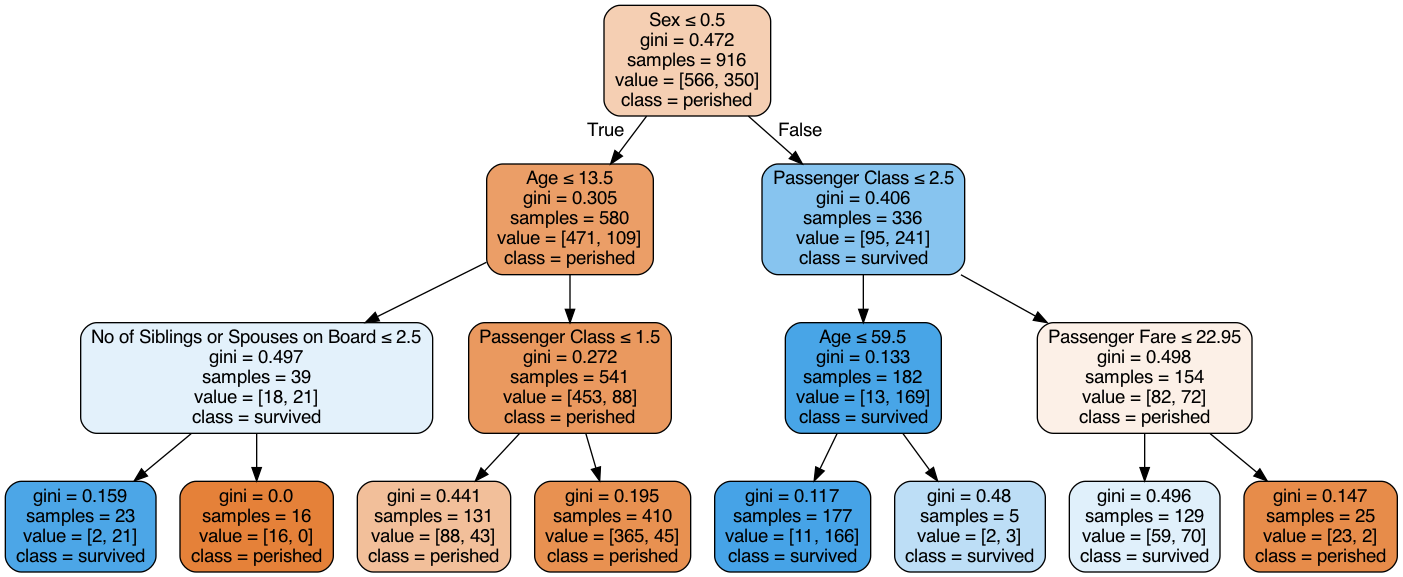

In [27]:
dot_data = export_graphviz(model, out_file=None,
                           feature_names=col_x,
                           class_names=['perished', 'survived'],
                           filled=True, rounded=True,
                           special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_jpeg('tree.jpeg')
Image(graph.create_png())

In [29]:
predictions = model.predict(X_test)

In [30]:
print(f'Accuracy: {accuracy_score(Y_test, predictions):0.3f}')
print(f'Precision: {precision_score(Y_test, predictions):0.3f}')
print(f'Recall: {recall_score(Y_test, predictions):0.3f}')
print(f'f1: {f1_score(Y_test, predictions):0.3f}')

Accuracy: 0.802
Precision: 0.777
Recall: 0.673
f1: 0.721
